# SpatialSamplingPro Tutorial: Complete Guide

**Spatial Sampling Protocol & Optimization**

A comprehensive guide to reproducible spatial sampling design for urban studies and geographic research.

---

## What You'll Learn

1. Installation and setup
2. Basic sampling strategies (Grid, Road Network)
3. Strategy comparison and selection
4. Parameter optimization
5. Error handling and best practices
6. Performance considerations
7. Complete reproducible workflows

---

**Authors**: Jiale Guo & Mingfeng Tang  
**Institution**: Politecnico di Milano  
**Course**: Geospatial Processing  
**Date**: 2025-01-26

## 1. Installation and Setup

In [1]:
# Core SpatialSamplingPro imports
import ssp
from ssp import (
    GridSampling, 
    RoadNetworkSampling, 
    SamplingConfig
)

# Geospatial libraries
import geopandas as gpd
from shapely.geometry import box, Polygon

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data handling
import pandas as pd
import numpy as np

# Check version
print(f"SpatialSamplingPro version: {ssp.__version__}")
print(f"Authors: {ssp.__author__}")

SpatialSamplingPro version: 0.1.0
Authors: Jiale Guo, Mingfeng Tang


---

## 2. Basic Concepts

### What is SpatialSamplingPro?

SpatialSamplingPro provides **scientific, reproducible, and documented** spatial sampling methods for urban studies and geographic research.

### Key Features

- ✅ **Multiple Sampling Strategies**: Grid, road network, and more
- ✅ **Reproducibility**: Same parameters = same results (using seeds)
- ✅ **Quality Assessment**: Built-in metrics and validation
- ✅ **Standardized Output**: GeoJSON with complete metadata

### Core Components

1. **SamplingConfig**: Configuration parameters (spacing, CRS, seed)
2. **SamplingStrategy**: Algorithm for generating sample points
3. **GeoDataFrame**: Output format with spatial data

---

## 3. Basic Sampling Strategies

### 3.1 Grid Sampling

Grid sampling is the simplest and most transparent method. It creates a regular grid of sample points.

#### Define Study Area

In [2]:
# Create a rectangular boundary (in degrees, roughly 10km x 10km)
# This example uses Milan, Italy coordinates
milan_boundary = box(9.10, 45.40, 9.30, 45.60)

print(f"Boundary type: {type(milan_boundary)}")
print(f"Boundary area: {milan_boundary.area:.4f} square degrees")
print(f"Bounds: {milan_boundary.bounds}")

Boundary type: <class 'shapely.geometry.polygon.Polygon'>
Boundary area: 0.0400 square degrees
Bounds: (9.1, 45.4, 9.3, 45.6)


#### Configure Grid Sampling

In [3]:
# Create configuration
# IMPORTANT: spacing is in METERS, not degrees!
# For Milan area (latitude ~45.5°), 1 degree ≈ 111km
# Common spacings: Urban=50-100m, Suburban=100-200m, Rural=200-500m
config = SamplingConfig(
    spacing=100,      # 100 meters spacing
    crs="EPSG:4326",   # WGS84 coordinate system (will auto-convert to degrees)
    seed=42             # For reproducibility
)

print(f"Spacing: {config.spacing} meters")
print(f"CRS: {config.crs}")
print(f"Seed: {config.seed}")

Spacing: 100 meters
CRS: EPSG:4326
Seed: 42


#### Generate Grid Sample Points

In [4]:
# Create grid sampling strategy
grid_strategy = GridSampling(config)

# Generate sample points
grid_points = grid_strategy.generate(milan_boundary)

# Display results
print(f"Generated {len(grid_points)} sample points")
print(f"\nColumns in output:")
print(grid_points.columns.tolist())
print(f"\nFirst 5 points:")
print(grid_points.head())

Generated 35721 sample points

Columns in output:
['geometry', 'sample_id', 'strategy', 'timestamp', 'grid_x', 'grid_y', 'spacing_m']

First 5 points:
                   geometry                sample_id       strategy  \
0  POINT (9.10106 45.40106)  grid_sampling_0001_0001  grid_sampling   
1  POINT (9.10106 45.40211)  grid_sampling_0001_0002  grid_sampling   
2  POINT (9.10106 45.40317)  grid_sampling_0001_0003  grid_sampling   
3  POINT (9.10106 45.40423)  grid_sampling_0001_0004  grid_sampling   
4  POINT (9.10106 45.40529)  grid_sampling_0001_0005  grid_sampling   

                    timestamp  grid_x  grid_y  spacing_m  
0  2026-01-26T02:06:01.506598       1       1        100  
1  2026-01-26T02:06:01.506598       1       2        100  
2  2026-01-26T02:06:01.506598       1       3        100  
3  2026-01-26T02:06:01.506598       1       4        100  
4  2026-01-26T02:06:01.506598       1       5        100  


#### Visualize Grid Samples

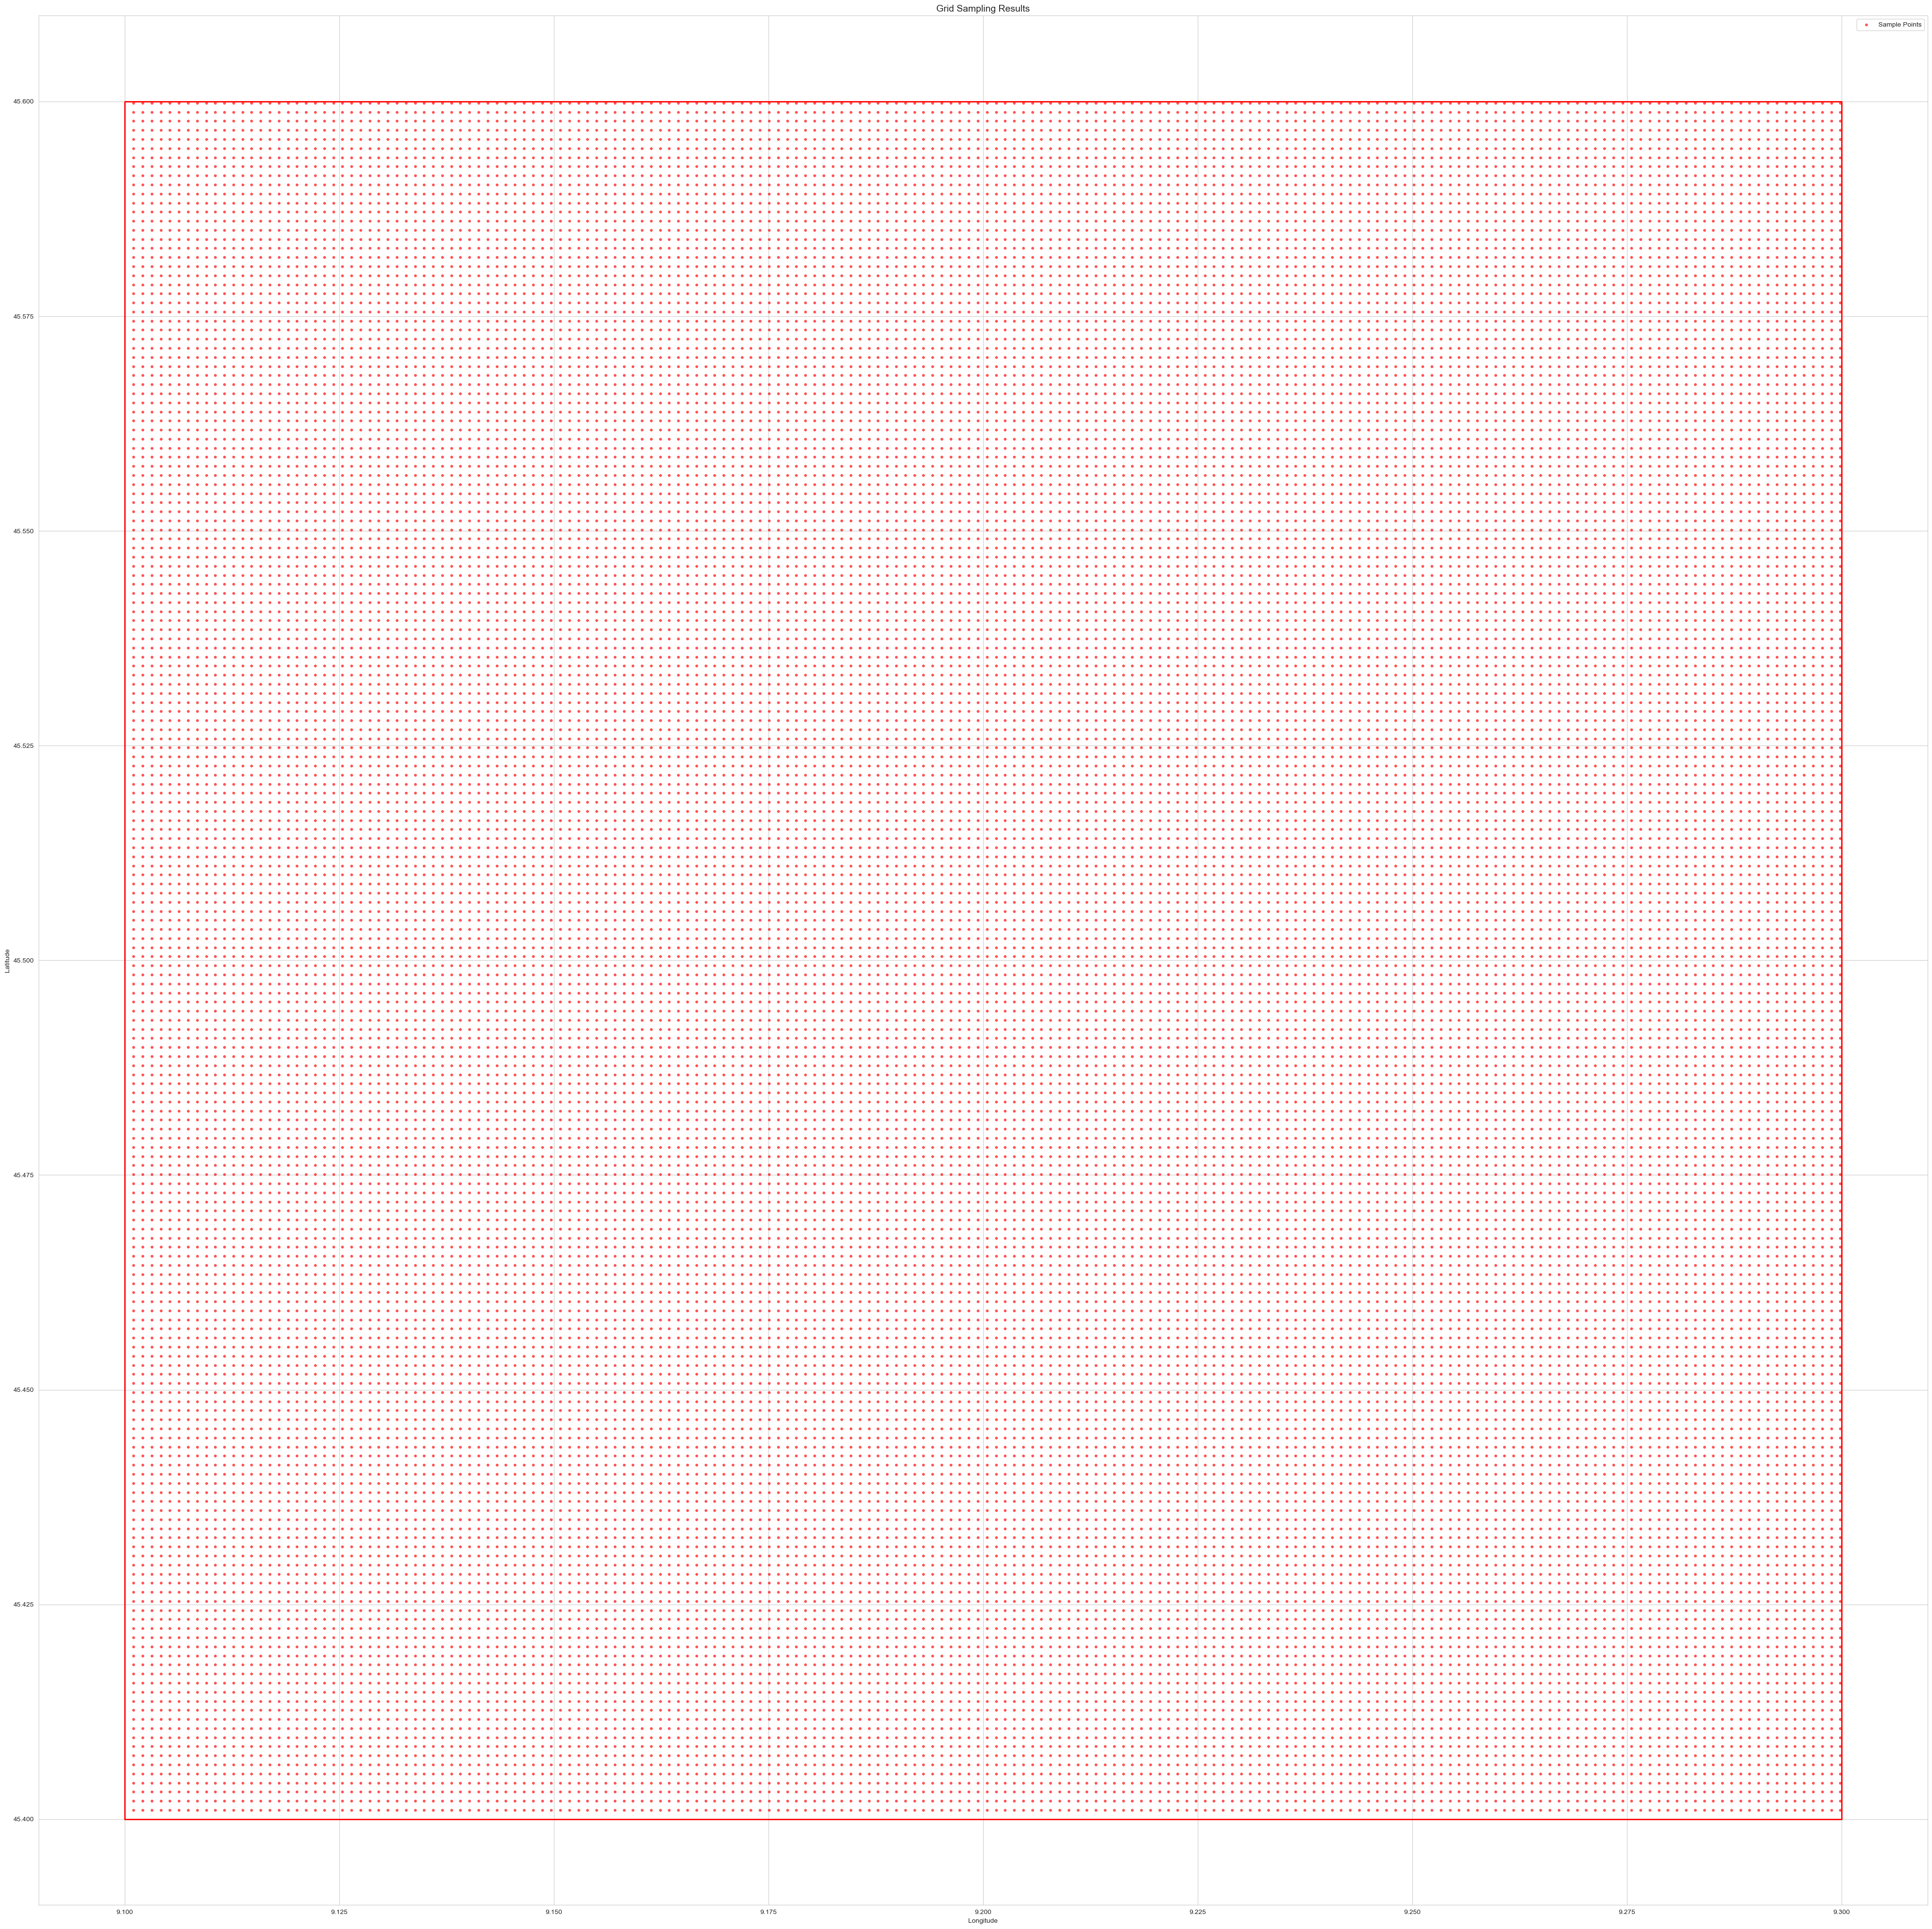

In [8]:
# Plot the grid sampling results
fig, ax = plt.subplots(figsize=(40, 40))

# Plot boundary
gpd.GeoSeries([milan_boundary]).plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# Plot sample points
ax.scatter(
    grid_points.geometry.x,
    grid_points.geometry.y,
    s=10,
    c='red',
    alpha=0.6,
    label='Sample Points'
)

ax.set_title('Grid Sampling Results', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.tight_layout()
plt.show()

### 3.2 Road Network Sampling

Road network sampling places points along actual roads, which is more realistic for street view studies.

**Note**: This requires an internet connection to download road data from OpenStreetMap.

In [9]:
# === Configure Road Network Sampling ===
# Use a smaller test area (5km x 5km) for faster OSM download
milan_small = box(9.18, 45.45, 9.20, 45.47)

print("Test Area Configuration:")
print(f"  Small area: {milan_small.area:.6f} sq deg (~5km x 5km)")
print(f"  Using smaller area reduces download time from ~10min to ~2min")

# Create configuration with correct spacing
# IMPORTANT: spacing is in METERS for all CRS types
# For EPSG:4326 (geographic), the library auto-converts meters to degrees
road_config = SamplingConfig(
    spacing=20,      # 20 meters spacing (good for road network sampling)
    crs="EPSG:4326",
    seed=42
)

# Create road network sampling strategy
road_strategy = RoadNetworkSampling(
    road_config,
    network_type='drive'    # Use drivable roads only
)

print(f"\nRoad Network Configuration:")
print(f"  Network type: {road_strategy.network_type}")
print(f"  Spacing: {road_config.spacing} meters")
# The library will auto-convert to ~0.00018 degrees for EPSG:4326

Test Area Configuration:
  Small area: 0.000400 sq deg (~5km x 5km)
  Using smaller area reduces download time from ~10min to ~2min

Road Network Configuration:
  Network type: drive
  Spacing: 20 meters


In [10]:
# === Generate Road Network Sample Points ===
import time
import sys

print("=" * 70)
print("Downloading Road Network from OpenStreetMap")
print("=" * 70)
print(f"\nArea: {milan_small.area:.6f} sq degrees (~5km x 5km)")
print(f"Expected time: 1-3 minutes depending on network connection")
print(f"\n⚠️  NOTE: If this takes longer than 3 minutes, you may:")
print(f"   1. Press 'Kernel > Interrupt' in the menu")
print(f"   2. Skip this section and continue with Grid Sampling")
print(f"   3. Or try again later when network is better")
print(f"\nStarting download...\n")

start_time = time.time()
road_points = None  # Initialize

try:
    # Add timeout warning
    import signal
    
    class TimeoutError(Exception):
        pass
    
    def timeout_handler(signum, frame):
        raise TimeoutError("Download timeout after 120 seconds")
    
    # Set timeout for Unix systems (not Windows)
    try:
        signal.signal(signal.SIGALRM, timeout_handler)
        signal.alarm(120)  # 120 second timeout
    except (AttributeError, NotImplementedError):
        # Windows or other systems without SIGALRM
        print("(No timeout available on this system)")
        pass
    
    road_points = road_strategy.generate(milan_small)
    
    # Cancel timeout
    try:
        signal.alarm(0)
    except:
        pass
    
    elapsed = time.time() - start_time

    print(f"\n{'='*70}")
    print(f"✓ Download Successful!")
    print(f"{'='*70}")
    print(f"  Time elapsed: {elapsed:.1f} seconds")
    print(f"  Sample points generated: {len(road_points):,}")

    if len(road_points) > 0:
        road_metrics = road_strategy.calculate_road_network_metrics()
        density = road_metrics['n_points'] / road_metrics['total_road_length_km']

        print(f"\nRoad Network Metrics:")
        print(f"  Total road length: {road_metrics['total_road_length_km']:.2f} km")
        print(f"  Number of edges: {road_metrics['n_edges']}")
        print(f"  Number of nodes: {road_metrics['n_nodes']}")
        print(f"  Sampling density: {density:.0f} points/km")

except (RuntimeError, TimeoutError) as e:
    print(f"\n{'='*70}")
    print(f"✗ Download Failed or Timed Out")
    print(f"{'='*70}")
    print(f"\nError: {e}")
    print(f"\nThis is okay! Road Network Sampling requires:")
    print(f"  1. Good internet connection")
    print(f"  2. Access to OpenStreetMap servers")
    print(f"  3. Reasonable boundary size")
    print(f"\nYou can:")
    print(f"  - Skip ahead to Grid Sampling examples")
    print(f"  - Try again later with better network")
    print(f"  - Use a smaller boundary area")
    road_points = None  # Set to None so later cells can check

except Exception as e:
    print(f"\n{'='*70}")
    print(f"✗ Unexpected Error")
    print(f"{'='*70}")
    print(f"\n{type(e).__name__}: {e}")
    road_points = None

print(f"\n{'='*70}\n")


Area: 0.000400 sq degrees (~5km x 5km)
Expected time: 1-3 minutes depending on network connection

⚠️  NOTE: If this takes longer than 3 minutes, you may:
   1. Press 'Kernel > Interrupt' in the menu
   2. Skip this section and continue with Grid Sampling
   3. Or try again later when network is better

Starting download...


⚠️  Warning: spacing=20 degrees ≈ 2220000m
    This may generate too many points. Consider:
    - spacing=0.0001 for ~11m (dense)
    - spacing=0.0005 for ~55m (moderate)
    - spacing=0.0010 for ~110m (sparse)

✓ Download Successful!
  Time elapsed: 0.8 seconds
  Sample points generated: 2,343

Road Network Metrics:
  Total road length: 62.69 km
  Number of edges: 875
  Number of nodes: 482
  Sampling density: 37 points/km




/var/folders/d7/xxfb2hqn39s0ncd3ff5brjdc0000gn/T/ipykernel_10982/2087105647.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


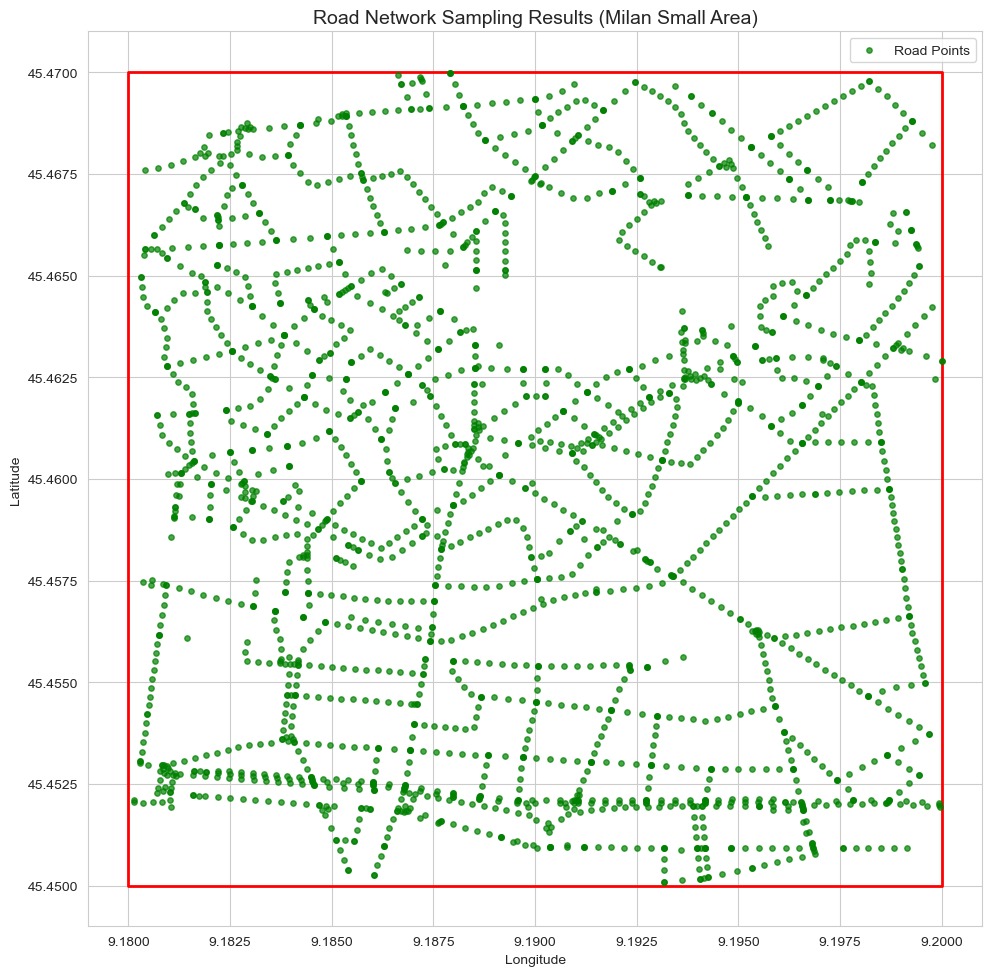


Note: This map shows 2343 road network sample points
within the smaller test area (milan_small)


In [11]:
# Plot road network sampling results
if road_points is not None and len(road_points) > 0:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot boundary
    gpd.GeoSeries([milan_small]).plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, label='Study Area')
    
    # Plot sample points
    ax.scatter(
        road_points.geometry.x,
        road_points.geometry.y,
        s=15,
        c='green',
        alpha=0.7,
        label='Road Points'
    )
    
    ax.set_title('Road Network Sampling Results (Milan Small Area)', fontsize=14)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"\nNote: This map shows {len(road_points)} road network sample points")
    print(f"within the smaller test area (milan_small)")
else:
    print("⚠️  No road network points available.")
    print("   This is okay! Road Network Sampling requires internet connection.")
    print("   You can continue with the Grid Sampling examples.")
    print("\n💡 Tip: You can come back and try Road Network Sampling later when:")
    print("   - You have a better internet connection")
    print("   - OpenStreetMap servers are less busy")
    print("   - You want to explore street-level sampling")

---

## 4. Strategy Comparison

Compare multiple sampling strategies to choose the best one for your study.

In [12]:
# Define study area for comparison (smaller for faster processing)
study_area = box(9.18, 45.45, 9.20, 45.47)

print(f"Study area: {study_area.area:.6f} sq degrees (~5km x 5km)")

Study area: 0.000400 sq degrees (~5km x 5km)


In [13]:
# Create multiple strategies with different parameters
strategies = {
    'Grid (50m)': GridSampling(SamplingConfig(spacing=50, seed=42)),
    'Grid (100m)': GridSampling(SamplingConfig(spacing=100, seed=42)),
    'Grid (200m)': GridSampling(SamplingConfig(spacing=200, seed=42)),
}

print(f"Created {len(strategies)} strategies for comparison")

Created 3 strategies for comparison


In [14]:
# Generate samples for each strategy
results = {}

print("Generating samples for each strategy...")
print("=" * 60)

for name, strategy in strategies.items():
    try:
        print(f"\nGenerating {name}...")
        points = strategy.generate(study_area)
        
        if len(points) == 0:
            print(f"  ⚠️  Warning: No points generated!")
            continue
        
        print(f"  ✓ Generated {len(points)} points")
        
        metrics = strategy.calculate_coverage_metrics()
        print(f"  ✓ Metrics: {metrics['density_pts_per_km2']:.1f} pts/km²")
        
        results[name] = {
            'strategy': strategy,
            'points': points,
            'n_points': len(points),
            'metrics': metrics
        }
        
    except Exception as e:
        print(f"  ✗ Failed: {e}")

print(f"\n{'='*60}")
print(f"Successfully generated {len(results)}/{len(strategies)} strategies")

Generating samples for each strategy...

Generating Grid (50m)...
  ✓ Generated 1369 points
  ✓ Metrics: 421.1 pts/km²

Generating Grid (100m)...
  ✓ Generated 324 points
  ✓ Metrics: 111.7 pts/km²

Generating Grid (200m)...
  ✓ Generated 81 points
  ✓ Metrics: 31.5 pts/km²

Successfully generated 3/3 strategies


Strategy Comparison:
             Points  Density (pts/km²)  Area (km²)
Grid (50m)   1369.0             421.12        3.25
Grid (100m)   324.0             111.74        2.90
Grid (200m)    81.0              31.54        2.57


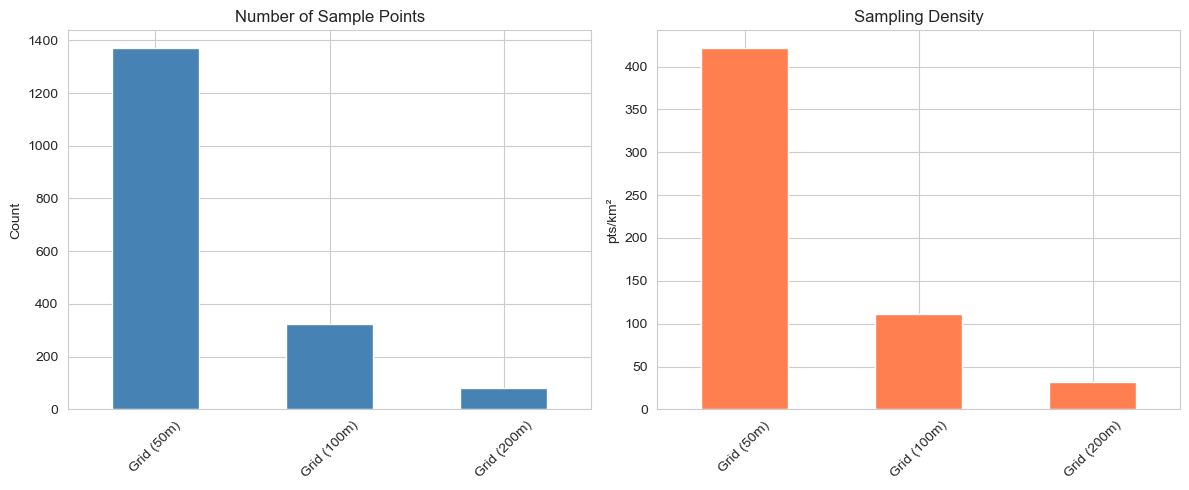

In [15]:
# Create comparison table
if len(results) > 0:
    comparison_df = pd.DataFrame({
        name: {
            'Points': data['n_points'],
            'Density (pts/km²)': data['metrics']['density_pts_per_km2'],
            'Area (km²)': data['metrics']['area_km2'],
        }
        for name, data in results.items()
    }).T

    print("Strategy Comparison:")
    print(comparison_df.round(2))

    # Plot comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    comparison_df['Points'].plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Number of Sample Points')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    comparison_df['Density (pts/km²)'].plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Sampling Density')
    axes[1].set_ylabel('pts/km²')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

### Strategy Selection Guide

| Strategy | Best For | Pros | Cons |
|----------|----------|------|------|
| **Grid** | General studies, baseline comparison | Simple, reproducible, uniform coverage | May not follow accessible routes |
| **Road Network** | Street view, transportation studies | Realistic placement, follows roads | Requires OSM data, less uniform |

---

## 5. Parameter Optimization

Optimize spacing to achieve a desired number of samples.

In [16]:
# Define target number of points
target_n = 500

print(f"Target: approximately {target_n} sample points")
print("Optimizing spacing...")

# Create strategy with initial guess
# Note: Use larger boundary for higher target_n
larger_area = box(9.15, 45.42, 9.25, 45.52)
strategy = GridSampling(SamplingConfig(spacing=100, seed=42))

# Optimize spacing
optimized_points = strategy.optimize_spacing_for_target_n(
    larger_area,
    target_n=target_n,
    min_spacing=20,
    max_spacing=500
)

print(f"\nOptimized spacing: {strategy.config.spacing:.2f} meters")
print(f"Actual points generated: {len(optimized_points)}")
print(f"Target: {target_n} points")
print(f"Difference: {abs(len(optimized_points) - target_n)} points ({abs(len(optimized_points) - target_n)/target_n*100:.1f}%)")

Target: approximately 500 sample points
Optimizing spacing...

Optimized spacing: 411.30 meters
Actual points generated: 484
Target: 500 points
Difference: 16 points (3.2%)


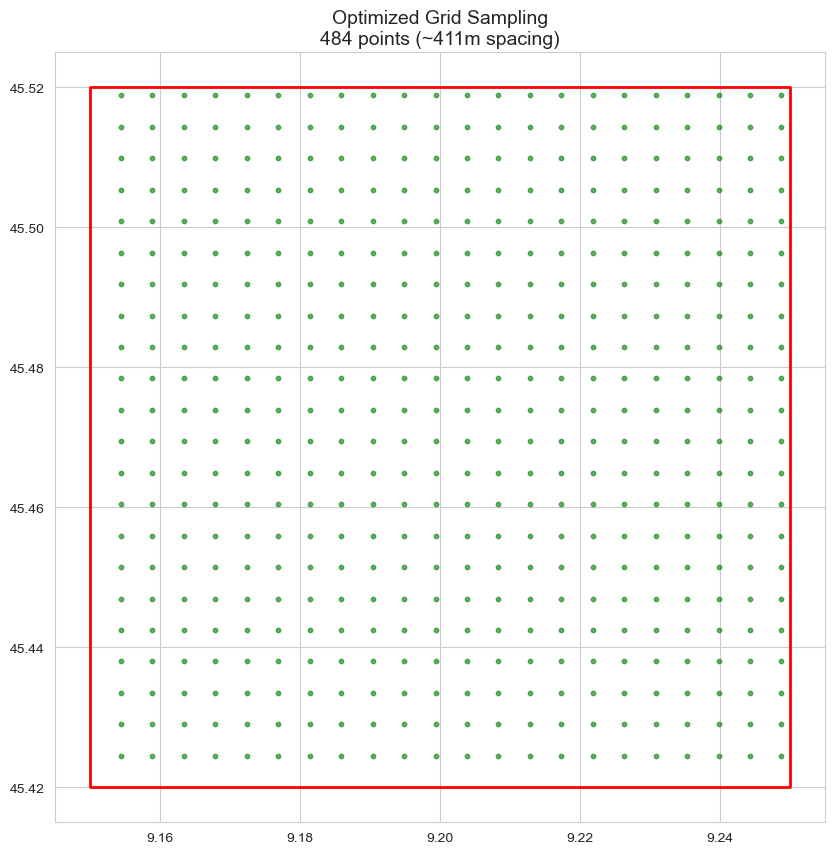

In [17]:
# Plot optimized sampling
fig, ax = plt.subplots(figsize=(10, 10))

gpd.GeoSeries([larger_area]).plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
ax.scatter(
    optimized_points.geometry.x,
    optimized_points.geometry.y,
    s=10,
    c='green',
    alpha=0.6
)

ax.set_title(f'Optimized Grid Sampling\n{len(optimized_points)} points (~{strategy.config.spacing:.0f}m spacing)', fontsize=14)
plt.show()

---

## 6. Data Export and Integration

### 6.1 Export with Metadata

In [18]:
# Export grid sampling to GeoJSON with metadata
grid_strategy.to_geojson("grid_samples_milan.geojson", include_metadata=True)
print("✓ Grid samples exported to: grid_samples_milan.geojson")

# Export road network sampling to GeoJSON (if available)
if road_points is not None and len(road_points) > 0:
    road_strategy.to_geojson("road_samples_milan.geojson", include_metadata=True)
    print("✓ Road network samples exported to: road_samples_milan.geojson")
else:
    print("⚠️  Road network samples not available (skipping export)")

✓ Grid samples exported to: grid_samples_milan.geojson
✓ Road network samples exported to: road_samples_milan.geojson


### 6.2 Export to Different Formats

In [19]:
# Generate samples
strategy = GridSampling(SamplingConfig(spacing=200, seed=42))
points = strategy.generate(study_area)

# Export to different formats

# 1. GeoJSON
points.to_file('samples.geojson', driver='GeoJSON')
print("✓ Exported to samples.geojson")

# 2. CSV (with coordinates)
points_csv = points.copy()
points_csv['lon'] = points.geometry.x
points_csv['lat'] = points.geometry.y
points_csv.drop('geometry', axis=1).to_csv('samples.csv', index=False)
print("✓ Exported to samples.csv")

✓ Exported to samples.geojson
✓ Exported to samples.csv


### 6.3 Integration with Pandas

In [20]:
# Convert to pandas DataFrame for analysis
df = pd.DataFrame(points.drop('geometry', axis=1))

print("Sample data as DataFrame:")
print(df.head(10))
print(f"\nDataFrame shape: {df.shape}")
print(f"\nSummary statistics:\n{df.describe()}")

Sample data as DataFrame:
                 sample_id       strategy                   timestamp  grid_x  \
0  grid_sampling_0001_0001  grid_sampling  2026-01-26T02:07:28.517104       1   
1  grid_sampling_0001_0002  grid_sampling  2026-01-26T02:07:28.517104       1   
2  grid_sampling_0001_0003  grid_sampling  2026-01-26T02:07:28.517104       1   
3  grid_sampling_0001_0004  grid_sampling  2026-01-26T02:07:28.517104       1   
4  grid_sampling_0001_0005  grid_sampling  2026-01-26T02:07:28.517104       1   
5  grid_sampling_0001_0006  grid_sampling  2026-01-26T02:07:28.517104       1   
6  grid_sampling_0001_0007  grid_sampling  2026-01-26T02:07:28.517104       1   
7  grid_sampling_0001_0008  grid_sampling  2026-01-26T02:07:28.517104       1   
8  grid_sampling_0001_0009  grid_sampling  2026-01-26T02:07:28.517104       1   
9  grid_sampling_0002_0001  grid_sampling  2026-01-26T02:07:28.517104       2   

   grid_y  spacing_m  
0       1        200  
1       2        200  
2       3    

---

## 7. Error Handling and Edge Cases

Learn to handle common errors and edge cases.

In [21]:
# Example 1: Handling invalid configuration
from ssp import ConfigurationError

try:
    invalid_config = SamplingConfig(spacing=-100)
except ConfigurationError as e:
    print(f"Caught error: {e}")
    print(f"Details: {e.details}")

Caught error: spacing must be positive (got -100). Spacing represents distance in meters between sample points.
Details: {'spacing': -100, 'valid_range': '(0, inf)'}


In [22]:
# Example 2: Validating spacing bounds
from ssp import check_spacing_bounds

test_spacings = [0.5, 50, 100, 500, 20000]

for spacing in test_spacings:
    try:
        check_spacing_bounds(spacing)
        print(f"✓ {spacing}m: Valid")
    except ConfigurationError as e:
        print(f"✗ {spacing}m: {e}")

✗ 0.5m: Spacing too small: 0.5m. Minimum is 1.0m.
✓ 50m: Valid
✓ 100m: Valid
✓ 500m: Valid
✗ 20000m: Spacing too large: 20000m. Maximum is 10000.0m.


In [23]:
# Example 3: Handling small boundary
from ssp import BoundaryError, handle_small_boundary

tiny_boundary = box(0, 0, 0.001, 0.001)

try:
    processed, modified = handle_small_boundary(tiny_boundary, spacing=100)
    print(f"Boundary was modified: {modified}")
except BoundaryError as e:
    print(f"Boundary too small: {e}")

Boundary area (0.00) is very small compared to spacing² (10000.00). Area ratio: 0.000


Boundary too small: Boundary area too small for specified spacing. Boundary area: 0.000001, spacing: 100m. Please use a larger boundary or smaller spacing.


---

## 8. Performance Considerations

### 8.1 Processing Time Estimation

In [24]:
from ssp import estimate_processing_time

# Estimate time for different strategies and point counts
point_counts = [100, 1000, 10000, 50000]

for n in point_counts:
    grid_time = estimate_processing_time(n, 'grid')
    road_time = estimate_processing_time(n, 'road_network')
    print(f"{n:5d} points: Grid={grid_time:.2f}s, Road={road_time:.2f}s")

  100 points: Grid=0.01s, Road=1.00s
 1000 points: Grid=0.10s, Road=10.00s
10000 points: Grid=1.00s, Road=100.00s
50000 points: Grid=5.00s, Road=500.00s


### 8.2 Large Output Warnings

In [25]:
from ssp import warn_large_output
import warnings

print("Testing large output warnings:")

with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    
    warn_large_output(1000)
    print(f"  1000 points: {len(w)} warnings")
    
    warn_large_output(50000)
    print(f"  50000 points: {len(w)} warnings")
    if w:
        print(f"    Message: {w[-1].message}")

Testing large output warnings:
  1000 points: 0 warnings
  50000 points: 1 warnings
    Message: Generating 50000 sample points, which exceeds the recommended maximum of 10000. This may take longer and use more memory.


---

## 9. Visualization Tools

### 9.1 Coverage Statistics

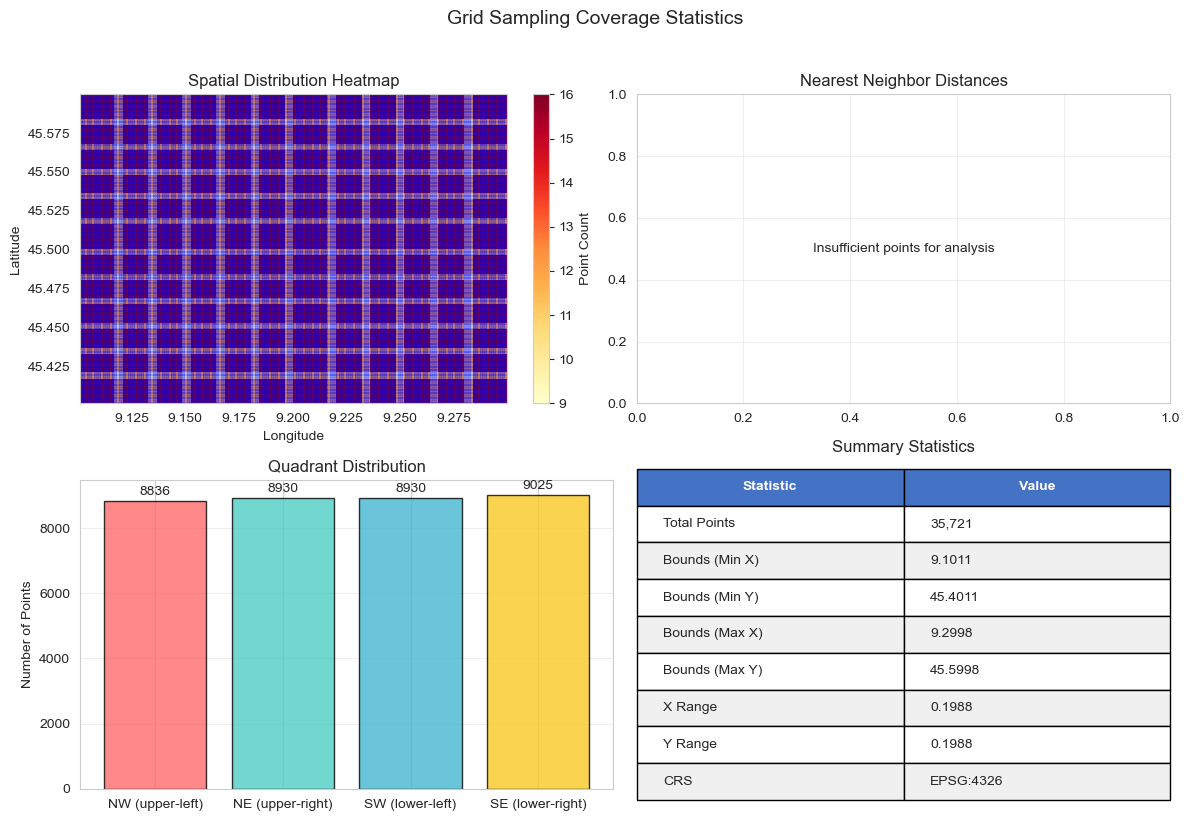

In [26]:
from ssp import plot_coverage_statistics, plot_spatial_distribution

# Create coverage statistics plot
# Note: plot_coverage_statistics() doesn't accept title parameter
# You can add title after plotting if needed
fig = plot_coverage_statistics(grid_points)
plt.suptitle('Grid Sampling Coverage Statistics', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

### 9.2 Spatial Distribution

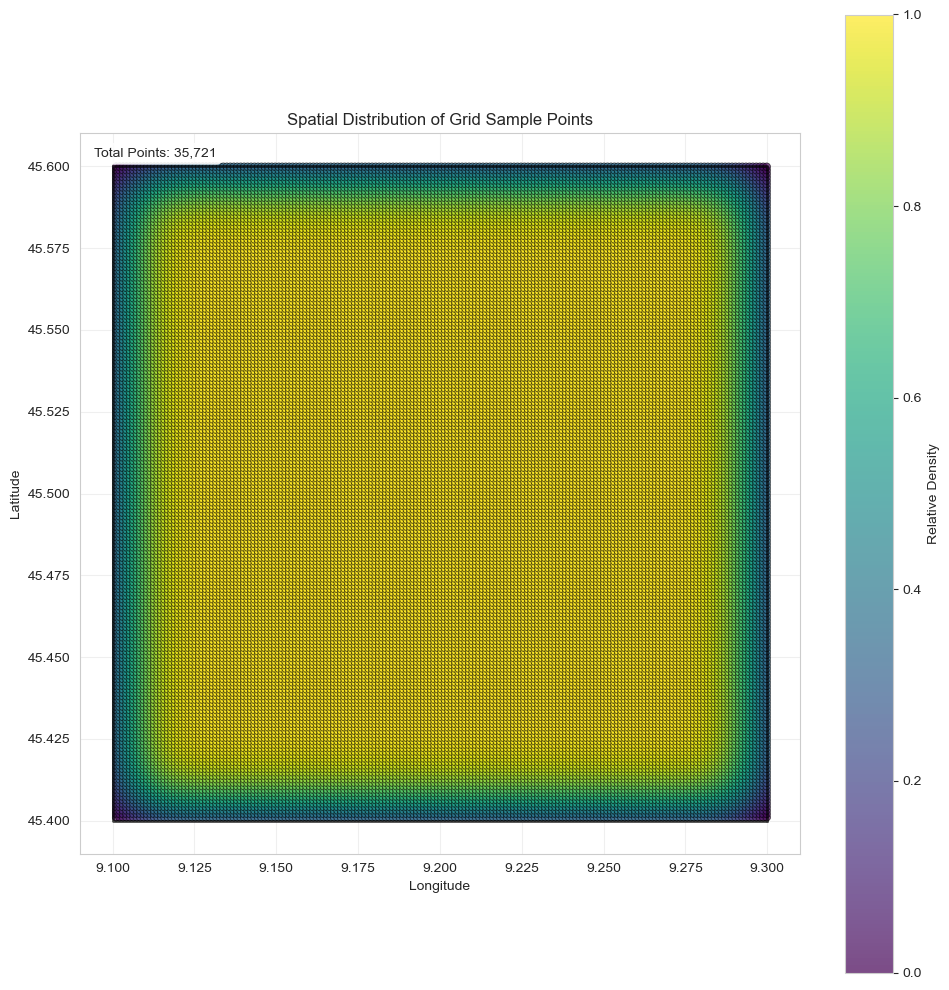

In [27]:
# Create spatial distribution plot
# plot_spatial_distribution() creates its own figure and axes
# Just pass the points and boundary, it will return a figure
fig = plot_spatial_distribution(grid_points, milan_boundary, title='Spatial Distribution of Grid Sample Points')
plt.show()

---

## 10. Complete Reproducible Workflow

Create a complete, reproducible sampling workflow from start to finish.

In [28]:
def reproducible_sampling_workflow(boundary, spacing, seed, output_prefix):
    """
    Complete reproducible sampling workflow.
    
    Args:
        boundary: Study area boundary
        spacing: Sampling spacing in meters
        seed: Random seed for reproducibility
        output_prefix: Prefix for output files
    
    Returns:
        Dictionary with results and metadata
    """
    # Configuration
    config = SamplingConfig(spacing=spacing, seed=seed)
    
    # Generate samples
    strategy = GridSampling(config)
    points = strategy.generate(boundary)
    
    # Calculate metrics
    metrics = strategy.calculate_coverage_metrics()
    
    # Export
    geojson_path = f"{output_prefix}_samples.geojson"
    strategy.to_geojson(geojson_path, include_metadata=True)
    
    # Return results
    return {
        'config': config.to_dict(),
        'points': points,
        'metrics': metrics,
        'output_file': geojson_path,
        'strategy': strategy.__class__.__name__
    }

# Run workflow
results = reproducible_sampling_workflow(
    boundary=study_area,
    spacing=150,
    seed=12345,
    output_prefix='milan_reproducible'
)

print("Reproducible workflow completed:")
print(f"  Strategy: {results['strategy']}")
print(f"  Points: {results['metrics']['n_points']}")
print(f"  Output: {results['output_file']}")
print(f"  Seed: {results['config']['seed']}")

Reproducible workflow completed:
  Strategy: GridSampling
  Points: 144
  Output: milan_reproducible_samples.geojson
  Seed: 12345


---

## 11. Best Practices and Summary

### 11.1 Choosing the Right Strategy

| Strategy | Best For | Spacing Guidelines |
|----------|----------|-------------------|
| **Grid** | General studies, baseline comparison | Urban: 50-100m, Suburban: 100-200m, Rural: 200-500m |
| **Road Network** | Street view, transportation studies | Urban: 20-50m, Suburban: 50-100m, Rural: 100-200m |

### 11.2 Key Principles

1. **Always use seeds** for reproducibility
2. **Validate inputs** before processing
3. **Handle errors** gracefully
4. **Document everything** - config, parameters, results
5. **Test on small areas** before scaling up

### 11.3 Common Issues and Solutions

**Issue 1: No points generated**
```python
# Solution: Check boundary size vs spacing
# Try: (1) Larger boundary, (2) Smaller spacing
```

**Issue 2: OSM download fails**
```python
# Solution: Check internet connection and boundary validity
# Try: (1) Different network_type ('walk' vs 'drive'),
#      (2) Smaller boundary area
```

**Issue 3: Points outside boundary**
```python
# Solution: Check CRS compatibility
# Use projected CRS (e.g., EPSG:3857) for accurate spacing
```

### 11.4 Performance Tips

- Use appropriate CRS for accurate spacing
- Consider point count vs. accuracy trade-offs
- Use performance tools for large datasets
- Cache results when possible

---

## Summary

In this tutorial, you learned:

1. ✅ How to install and import SpatialSamplingPro
2. ✅ How to create sampling configurations
3. ✅ How to generate grid and road network samples
4. ✅ How to compare different strategies
5. ✅ How to optimize parameters for target sample size
6. ✅ How to handle errors and edge cases
7. ✅ How to export results with metadata
8. ✅ How to create reproducible workflows

### Next Steps

- Try different spacing values
- Compare multiple strategies on the same area
- Use your own study area boundary
- Integrate with your research workflow

### Resources

- **Documentation**: `docs/` folder
- **API Reference**: `docs/api_reference.md`
- **Case Studies**: `docs/case_studies/`
- **GitHub**: https://github.com/GuojialeGeographer/GProcessing2025

---

**Happy Sampling! 🎉**